## Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.cloud import bigquery
from pandas_gbq import read_gbq

In [ ]:
from google.colab import auth
auth.authenticate_user()
project_id = "prello-project-434904"

## Queries

In [ ]:
query_all = """
  SELECT *
  FROM `prello-project-434904.prello.variables_all`
"""

In [ ]:
query_house = """
  SELECT *
  FROM `prello-project-434904.prello.variables_house`
"""

In [ ]:
query_apartment = """
  SELECT *
  FROM `prello-project-434904.prello.variables_apartment`
"""

## DataFrame

In [ ]:
df_all = read_gbq(query_all,project_id)
df_all = df_all[['population_growth',
                 'price_rental',
                 'price_volatility',
                 'iti',
                 'tai',
                 'hdi']]
df_all.shape

Downloading: 100%|██████████|


(85, 6)

In [ ]:
df_house = read_gbq(query_house,project_id)
df_house = df_house[['population_growth',
                 'price_rental',
                 'price_volatility',
                 'iti',
                 'tai',
                 'hdi_house']]
df_house.shape

Downloading: 100%|██████████|


(85, 6)

In [ ]:
df_apartment = read_gbq(query_apartment,project_id)
df_apartment = df_apartment[['population_growth',
                 'price_rental',
                 'price_volatility',
                 'iti',
                 'tai',
                 'hdi']]
df_apartment.shape

Downloading: 100%|██████████|


(85, 6)

## Visualizacion Variable

**Variables all**

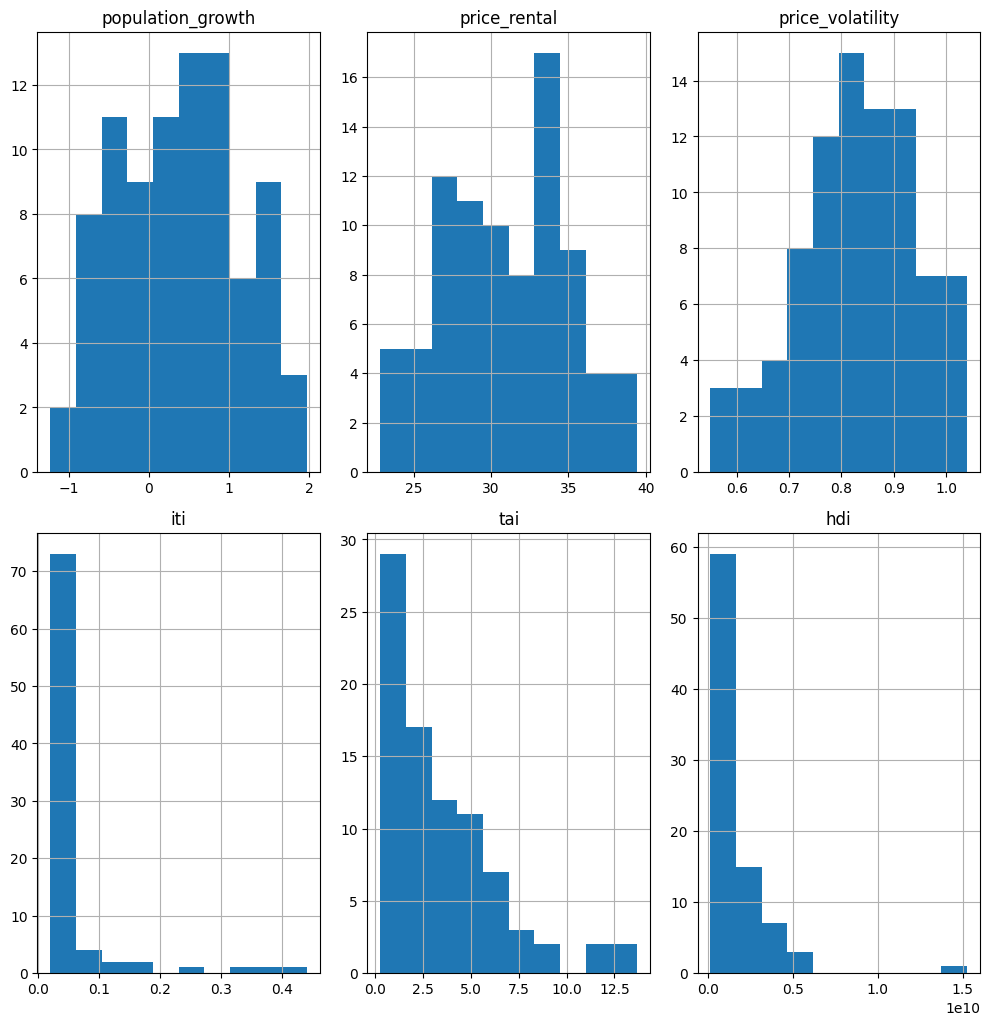

In [ ]:
all_cols = df_all.columns.to_list()

num_total = len(all_cols)
num_filas = (num_total - 1 // 3 + 1)

plt.rcParams['figure.figsize'] = [10, 5 * num_filas]
fig, axes = plt.subplots(num_filas, 3)

for i, col in enumerate(all_cols):
    fila = i // 3
    columna = i % 3
    df_all[col].hist(ax=axes[fila, columna])
    axes[fila, columna].set_title(col)

for i in range(num_total, num_filas * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()

plt.rcParams['figure.figsize'] = [7, 7]

plt.show()

**Variables house**

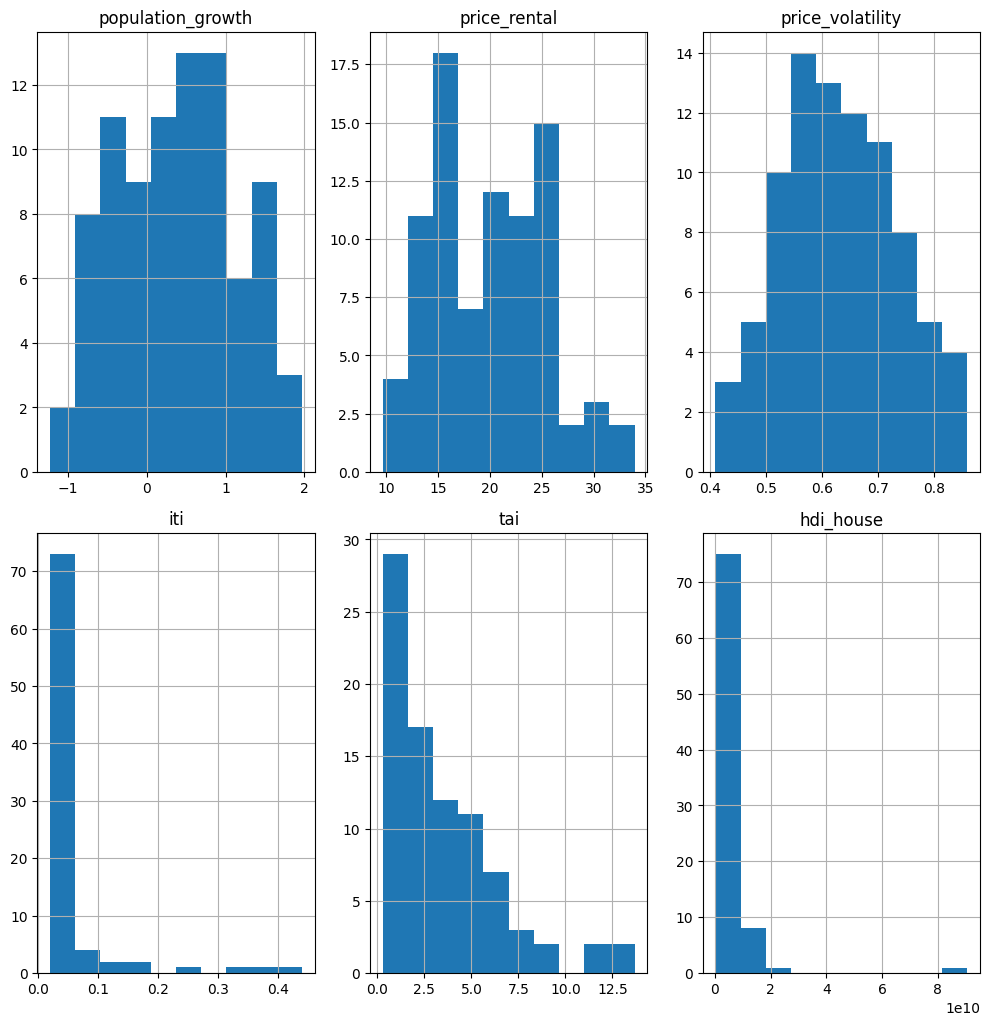

In [ ]:
house_cols = df_house.columns.to_list()

num_total = len(house_cols)
num_filas = (num_total - 1 // 3 + 1)

plt.rcParams['figure.figsize'] = [10, 5 * num_filas]
fig, axes = plt.subplots(num_filas, 3)

for i, col in enumerate(house_cols):
    fila = i // 3
    columna = i % 3
    df_house[col].hist(ax=axes[fila, columna])
    axes[fila, columna].set_title(col)

for i in range(num_total, num_filas * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()

plt.rcParams['figure.figsize'] = [7, 7]

plt.show()

**Variables appartement**

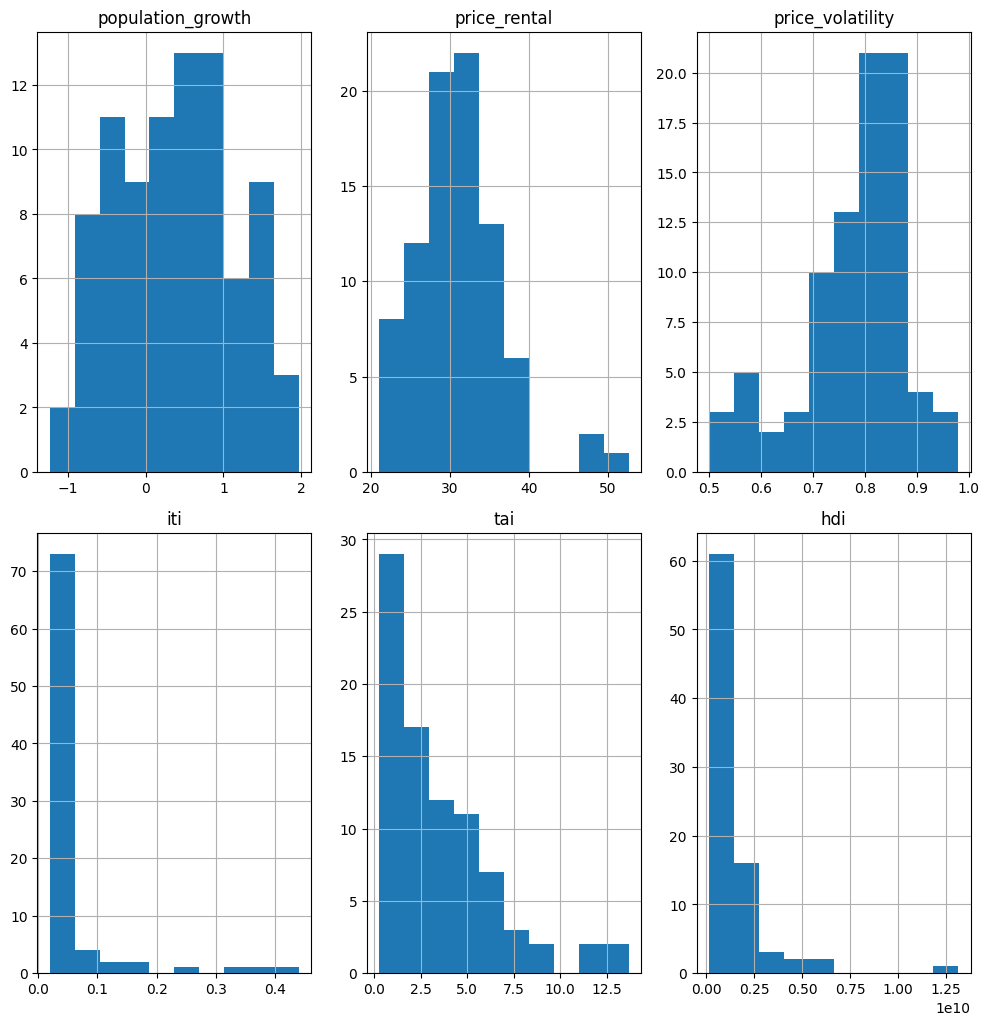

In [ ]:
appartement_cols = df_apartment.columns.to_list()

num_total = len(appartement_cols)
num_filas = (num_total - 1 // 3 + 1)

plt.rcParams['figure.figsize'] = [10, 5 * num_filas]
fig, axes = plt.subplots(num_filas, 3)

for i, col in enumerate(appartement_cols):
    fila = i // 3
    columna = i % 3
    df_apartment[col].hist(ax=axes[fila, columna])
    axes[fila, columna].set_title(col)

for i in range(num_total, num_filas * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()

plt.rcParams['figure.figsize'] = [7, 7]

plt.show()

**Conclusiones**
En las tablas all, house y appartement las variables iti, tai, hdi tienen distribuciones bastante sesgadas o con una gran concentración de datos en ciertos rangos, lo cual podría distorsionar un sistema de scoring escalado de 0 a 1 sin tratar los outliers. En este contexto se debe realizar transformaciones logarítmicas antes del escalado.

## Aplicacion Log

In [ ]:
# tabla all
df_all['iti_log'] = np.log(df_all['iti'])
df_all['tai_log'] = np.log(df_all['tai'])
df_all['hdi_log'] = np.log(df_all['hdi'])
# seleccion de varaibles log
df_all_log = df_all[['iti_log',
                 'tai_log',
                 'hdi_log']]

In [ ]:
# tabla house
df_house['iti_log'] = np.log(df_house['iti'])
df_house['tai_log'] = np.log(df_house['tai'])
df_house['hdi_log'] = np.log(df_house['hdi_house'])
# seleccion de varaibles log
df_house_log = df_house[['iti_log',
                 'tai_log',
                 'hdi_log']]

In [ ]:
# tabla appartement
df_apartment['iti_log'] = np.log(df_apartment['iti'])
df_apartment['tai_log'] = np.log(df_apartment['tai'])
df_apartment['hdi_log'] = np.log(df_apartment['hdi'])
# seleccion de varaibles log
df_appartement_log = df_apartment[['iti_log',
                 'tai_log',
                 'hdi_log']]

## Visualizacion variables log

**Varibles all log**

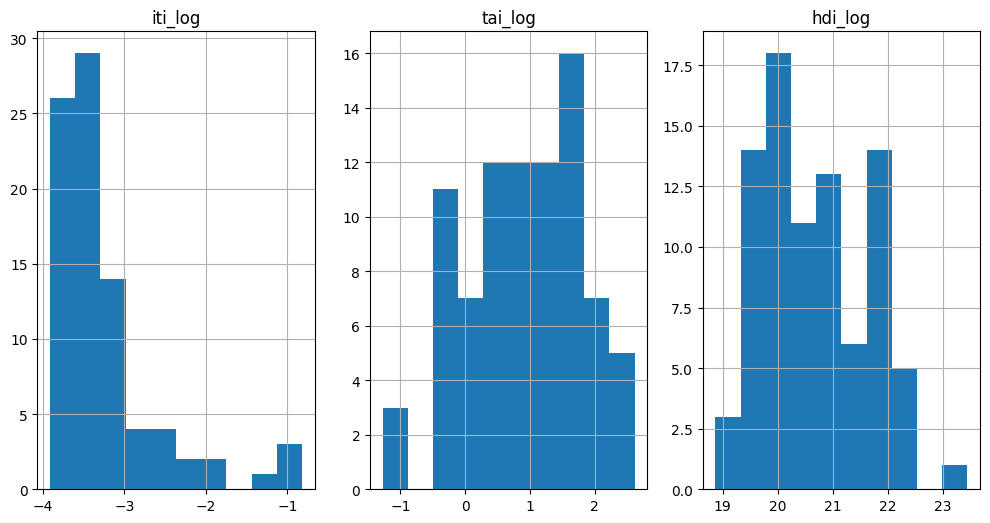

In [ ]:
all_log_cols = df_all_log.columns.to_list()

num_total = len(all_log_cols)
num_filas = (num_total - 1 // 3 + 1)

plt.rcParams['figure.figsize'] = [10, 5 * num_filas]
fig, axes = plt.subplots(num_filas, 3)

for i, col in enumerate(all_log_cols):
    fila = i // 3
    columna = i % 3
    df_all_log[col].hist(ax=axes[fila, columna])
    axes[fila, columna].set_title(col)

for i in range(num_total, num_filas * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()

plt.rcParams['figure.figsize'] = [7, 7]

plt.show()

**Varibles house log**

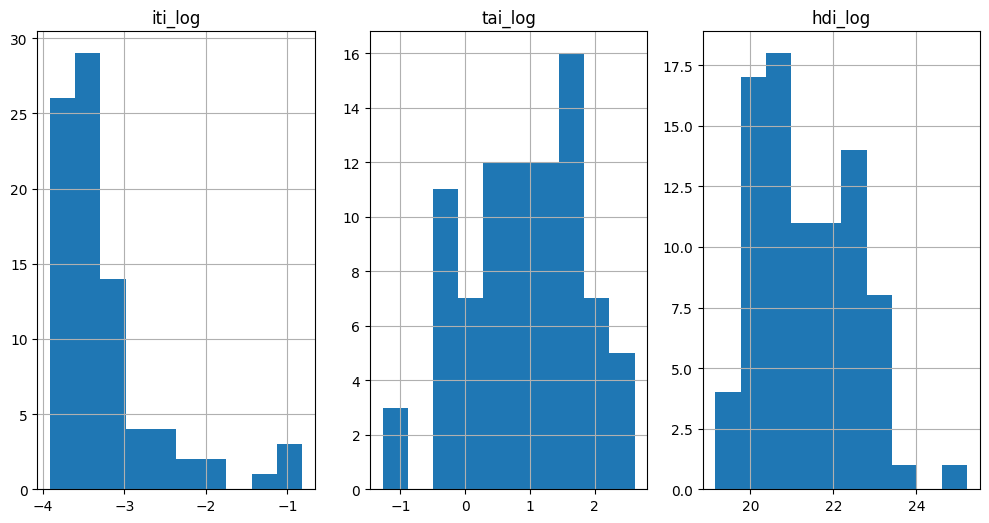

In [ ]:
house_log_cols = df_house_log.columns.to_list()

num_total = len(house_log_cols)
num_filas = (num_total - 1 // 3 + 1)

plt.rcParams['figure.figsize'] = [10, 5 * num_filas]
fig, axes = plt.subplots(num_filas, 3)

for i, col in enumerate(house_log_cols):
    fila = i // 3
    columna = i % 3
    df_house_log[col].hist(ax=axes[fila, columna])
    axes[fila, columna].set_title(col)

for i in range(num_total, num_filas * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()

plt.rcParams['figure.figsize'] = [7, 7]

plt.show()

**Variables appartement log**

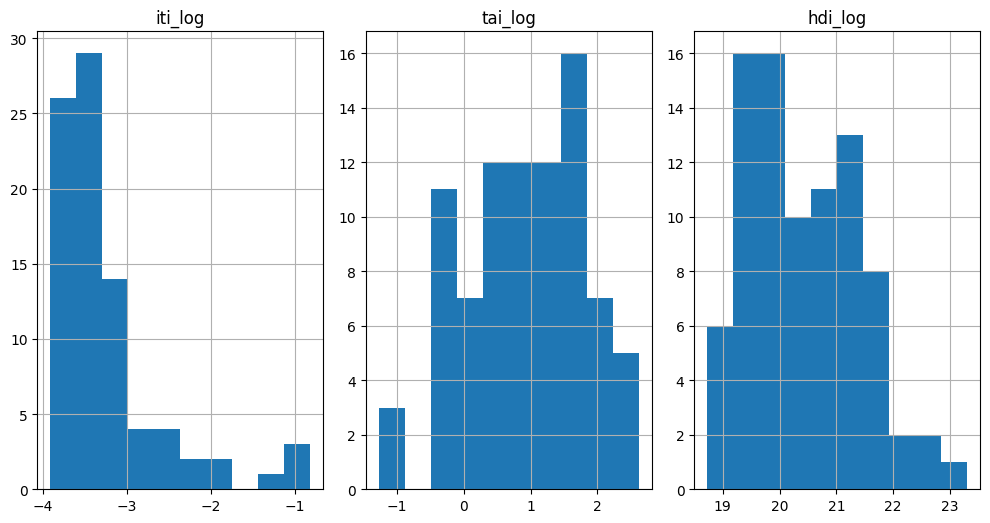

In [ ]:
appartement_log_cols = df_appartement_log.columns.to_list()

num_total = len(appartement_log_cols)
num_filas = (num_total - 1 // 3 + 1)

plt.rcParams['figure.figsize'] = [10, 5 * num_filas]
fig, axes = plt.subplots(num_filas, 3)

for i, col in enumerate(appartement_log_cols):
    fila = i // 3
    columna = i % 3
    df_appartement_log[col].hist(ax=axes[fila, columna])
    axes[fila, columna].set_title(col)

for i in range(num_total, num_filas * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()

plt.rcParams['figure.figsize'] = [7, 7]

plt.show()

**Conclusiones** las transformaciones logarítmicas han tenido un impacto positivo, mejorando la normalidad de las distribuciones y permitiendo un escalado más robusto.